In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_data = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\digit-recognizer\train.csv')
test_data = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\digit-recognizer\test.csv')
x_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:,0].values
x_test = test_data.iloc[:].values
x_train = x_train.reshape(x_train.shape[0],28,28,1)
y_train = y_train.reshape(y_train.shape[0],1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape)

(42000, 28, 28, 1) (42000, 1)
(28000, 28, 28, 1)


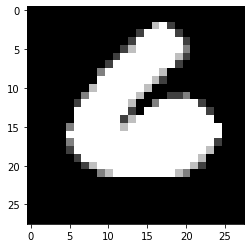

In [4]:
plt.imshow(x_train[500], cmap='gray')

In [5]:
x_train = x_train/255.
x_test = x_test/255.

In [6]:
Model = tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(32,activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')])

In [7]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          9232      
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4

In [8]:
Model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [9]:
Model.fit(x_train,y_train,batch_size=250,epochs=10)

Epoch 1/10


C:\Users\meetd\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\backend.py:4942: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


168/168 [==============================] - 24s 143ms/step - loss: 0.5657 - accuracy: 0.8270
Epoch 2/10
168/168 [==============================] - 25s 147ms/step - loss: 0.1182 - accuracy: 0.9646
Epoch 3/10
168/168 [==============================] - 25s 147ms/step - loss: 0.0791 - accuracy: 0.9762
Epoch 4/10
168/168 [==============================] - 25s 146ms/step - loss: 0.0638 - accuracy: 0.9794
Epoch 5/10
168/168 [==============================] - 25s 147ms/step - loss: 0.0537 - accuracy: 0.9837
Epoch 6/10
168/168 [==============================] - 25s 148ms/step - loss: 0.0463 - accuracy: 0.9858
Epoch 7/10
168/168 [==============================] - 25s 146ms/step - loss: 0.0418 - accuracy: 0.9868
Epoch 8/10
168/168 [==============================] - 25s 146ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 9/10
168/168 [==============================] - 25s 148ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 10/10
168/168 [==============================] - 25s 147ms/step - loss: 0.0309

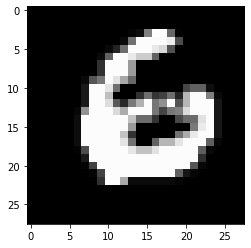

In [10]:
plt.imshow(x_test[500,:],cmap='gray')

In [11]:
predictions = Model.predict(x_test)
predicted = [0] * len(predictions)
for i in range(len(predictions)):
    predicted[i] = (np.argmax(predictions[i]))
print(predictions[500])
print(predicted[500])
sample = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\digit-recognizer\sample_submission.csv')
sample['Label'] = predicted
sample

[6.5516873e-04 7.3285477e-15 7.5083468e-09 1.3807079e-10 1.1472130e-10
 1.2091798e-06 9.9934226e-01 2.7528788e-16 1.3070436e-06 7.6876883e-10]
6


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [12]:
sample.to_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\my_submission.csv',index=False)
print('Submission Saved Succesfully')

Submission Saved Succesfully
